## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [41]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [42]:
row_count = df.shape[0]
print(row_count)

294478


c. The number of unique users in the dataset.

In [43]:
unique_users = df['user_id'].unique().shape[0]
unique_users

290584

d. The proportion of users converted.

In [44]:
converted = (df['converted'] == 1).sum()
prop_converted = converted/row_count
prop_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [45]:
x=df[ (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].shape[0]
y= df[ (df['group'] != 'treatment') & (df['landing_page'] == 'new_page')].shape[0]
x+y

3893

f. Do any of the rows have missing values?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# No missing values!

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
df0 = df[ (df['group'] == 'control') & (df['landing_page'] == 'old_page')  ]
df1=  df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df2=pd.concat([df0,df1])
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
unique_users_2 = df2['user_id'].unique().shape[0]
unique_users_2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
df2[df2['user_id'].duplicated()]
# The repeated user_id is 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [51]:
# Row 2893, user_id 773192

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
df2[df2['user_id'] == 773192].index
# Check what the indices are for the duplicated row.

Int64Index([1899, 2893], dtype='int64')

In [53]:
df2.drop(2893,inplace=True)
# Drop the duplicate row

In [54]:
df2[df2['user_id'] == 773192].index
# Good!

Int64Index([1899], dtype='int64')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [55]:
prob_convert = (df2['converted'] == 1).sum()/unique_users_2
prob_convert

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [56]:
prob_control = (df2['group'] == 'control').sum()/unique_users_2
prob_control_and_converted = (df2[  (df2['group'] == 'control')& (df2['converted'] == 1)].shape[0])/unique_users_2
prob_convert_given_control = prob_control_and_converted/prob_control
prob_convert_given_control

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [57]:
prob_treatment = (df2['group'] == 'treatment').sum()/unique_users_2
prob_treatment_and_converted = df2[  (df2['group'] == 'treatment')& (df2['converted'] == 1)].shape[0]/unique_users_2
prob_convert_given_treatment = prob_treatment_and_converted/prob_treatment
# formula for conditional probability
prob_convert_given_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [58]:
(df2['landing_page'] == 'new_page').sum()/unique_users_2

0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on my answers above, I do not think there is sufficient evidence to say the new treatment page leads to more conversions. There is only a difference of about .2% between converting given someone was in the treatment group versus being in the control group. In fact, the probability of converting given the treatment new page was provided is lower than that of conversion given the control page was provided. I speculate that this difference would not be enough evidence to say that the new treatment page leads to more conversions. To be able to say this with more confidence, I would have to run an A/B test.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: The new page is equal to or worse than the old page at converting users
 
Alternative Hypothesis: The new page is better than the old page at converting users

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [59]:
p_new= prob_convert
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [60]:
p_old = prob_convert
p_old

0.11959708724499628

c. What is $n_{new}$?

In [61]:
n_new = (df2[df2['landing_page'] == 'new_page']).shape[0]
n_new

145310

d. What is $n_{old}$?

In [62]:
n_old = (df2[df2['landing_page'] == 'old_page']).shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [63]:
new_page_converted = np.random.binomial(1, p_new,  n_new)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [64]:
old_page_converted =np.random.binomial(1, p_old,  n_old)


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [65]:
p_new_sim= new_page_converted.mean()
p_old_sim = old_page_converted.mean()
p_new_sim - p_old_sim


-0.00033256988033519841

In [ ]:
# Looks like 0.000332 was my p_new - p_old for this simulation.

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [75]:
np.random.binomial(n_new,p_new,10000)
# n_new trials, each entry in the array is the number of successful conversions in n_new trials with probability of success p_new. There are 10000 entries.
# So, to get 10,000 p_news, divide the array by 10,000


array([17210, 17518, 17562, ..., 17329, 17140, 17399])

In [76]:
new_page_converted_simulations = np.random.binomial(n_new,p_new,10000)/10000

In [77]:
#Do the same for old_page_converted

In [78]:
old_page_converted_simulations = np.random.binomial(n_old,p_old,10000)/10000

In [79]:
p_diffs = new_page_converted_simulations-old_page_converted_simulations

In [80]:
p_diffs

array([ 0.0059, -0.0152, -0.0255, ...,  0.0291, -0.017 ,  0.0098])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

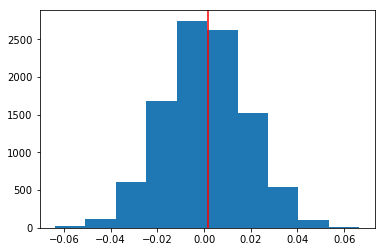

In [81]:
import matplotlib.pyplot as plt
plt.hist(p_diffs)
plt.axvline(x = prob_convert_given_control-prob_convert_given_treatment,color='red')
# plots the histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [82]:
(p_diffs > prob_convert_given_treatment- prob_convert_given_control).mean()
# p value calculation

0.54290000000000005

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What I computed in part j is the probability of finding the observed results, given that the null hypothesis is true. This is called the p value. Since we want to have a type one error rate of less than 0.05, if our p-value is less than this, we can say we have sufficient statistical evidence to reject the null hypothesis. Because my p-value is 0.542, and this is greater than the type 1 error rate we would like to stay under, we are unable to reject the null hypothesis. We stick with the hypothesis that there is no difference between the new and old pages in effectiveness.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
import statsmodels.api as sm

convert_old = df2[  (df2['group'] == 'control')& (df2['converted'] == 1)].shape[0]
convert_new = df2[  (df2['group'] == 'treatment')& (df2['converted'] == 1)].shape[0]
n_old = n_old
n_new = n_new


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [91]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative= 'larger')
print(z_score,p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score of -1.31 and the p-value of 0.905 mean that there was not enough statistical evidence to reject the null hypothesis. This is because the absolute value of the z-score is less than 1.96, and the p-value is greater than my type 1 error rate of 0.05. They agree with my findings in parts j and k.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I should be using logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [92]:

df2['intercept'] = 1
df2.head()
# Add intercept column

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [93]:

df2[['ab_page','t']] = pd.get_dummies(df['landing_page'])
df2.head()
# Add dummy variable columns

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,t
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1


In [94]:
del df2['t']
# Delete the extra column

In [95]:
df2.head()
# Check if the DataFrame looks how we want it to.

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


In [96]:
df2.tail()
# Check if the DataFrame looks how we want it to.

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,1
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [97]:
lm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        16:42:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page here is 0.190. The reason it differs from the value I found in part II has to do with the null and alternative hypothesis for my regression model.

The null hypothesis for my regression model is that parameter for the slope associated with changes in the landing page is equal to 0. The alternative hypothesis is that the paramter for the slope associated with changes in the landing page is not equal to 0.

i.e.
H0: The landing page is not a significant factor in predicting whether or not a person will convert.
HA: The landing page is a significant factor in predicting whether or not a person will convert.

In part II, the null hypothesis was that the new page is less than or equal to the old page in terms of effectiveness. The alternative hypothesis is that the new page is better than the old.

i.e.
H0: p_new <= p_old
HA: p_new > p_old

Simply put, we are doing two different tests. For our regression model, we did a two sided test. For Part II, we did a one-sided test.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors in my regression model because there is not evidence to support that the factor I have included is significant in terms of predicting whether or not an individual converts. Therefore, it is reasonable to include more factors to try to search for factors which are significant. However, a disadvantage to adding additional terms into my regression model is that I might end up adding factors which are related to each other (multicollinearity). When we do linear regression, we assume that the independent variables we are testing are not related to one another. Adding more and more factors increases the chance of them being related to each other, causing problems for a linear regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [99]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [100]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [101]:
del df_new['CA']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [102]:
lm2 = sm.Logit(df_new['converted'], df_new[['intercept','US','UK']])
results2=lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        16:42:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

# Based on the results of my summary, it does not seem like country had an effect in conversion rate. The p values of 0.13 and 0.074 are both higher than 0.05, which means that there is not sufficient statistical evidence that a conversion rate for a US user or a UK user is different from the conversion rate of a Canadian user. It does not appear that the country had a significant impact on user conversion rate.



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [103]:
df_new['ab_page_times_US'] = df_new['ab_page']*df_new['US']
df_new['ab_page_times_UK']= df_new['ab_page']*df_new['UK']

In [104]:
### Fit Your Linear Model And Obtain the Results
lm3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK','ab_page_times_US','ab_page_times_UK' ]])
results3 = lm3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Dec 2017   Pseudo R-squ.:               3.482e-05
Time:                        16:42:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page             -0.0674      0.052     -1.297      0.195      -0.169       0.034
US                   0.0175      0.038      0.465      0.642      -0.056       0.091
UK                   0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page_times_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page_times_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
====================================================================================
"""

# All of the p-values are above 0.15, which means again that there is not sufficient statistical evidence to suggest that any of these factors are significant in predicting whether a user converts or not.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.